<a href="https://colab.research.google.com/github/ALRIER/Class2023/blob/March2023/Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rpy2[robjects,pandas]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# activate R magic
%load_ext rpy2.ipython

In [4]:
%%R
install.packages("gapminder")
install.packages("dslabs")
install.packages("NHANES")
install.packages("tidyverse")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp9q9ctx/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp9q9ctx/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp9q9ctx/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/Rtmp9q9ctx/downloaded_packages’



In [5]:
%%R

library("tidyverse")
library(gapminder)
library(dplyr)
library(dslabs)
library(NHANES)
data(NHANES)
data(heights)
data(murders)
data(gapminder)
library("ggplot2")


✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘dslabs’



    gapminder




In [6]:
%%R
ls()

[1] "gapminder" "heights"   "murders"   "NHANES"    "oecd"      "opec"     


In [7]:
%%R 
print(gapminder%>%head())

              country year infant_mortality life_expectancy fertility
1             Albania 1960           115.40           62.87      6.19
2             Algeria 1960           148.20           47.50      7.65
3              Angola 1960           208.00           35.98      7.32
4 Antigua and Barbuda 1960               NA           62.97      4.43
5           Argentina 1960            59.87           65.39      3.11
6             Armenia 1960               NA           66.86      4.55
  population          gdp continent          region
1    1636054           NA    Europe Southern Europe
2   11124892  13828152297    Africa Northern Africa
3    5270844           NA    Africa   Middle Africa
4      54681           NA  Americas       Caribbean
5   20619075 108322326649  Americas   South America
6    1867396           NA      Asia    Western Asia


Ya tengo la base de datos murders en R, pero como este libro servirá para enseñar Python y R, voy a exrpotar las bases de datos a ámbos entornos para así poder usarlas a lo largo de la clase. 

Aquí les dejó la sentencia de código que me permite expoertar datos de un entorno a otro; esto puede ser útil para ustedes en un furuto cuando estén trabajando por su cuenta. 

In [8]:
# Importa la base de datos murders desde R a Python
%R data(murders)
%R -o murders

In [9]:
murders.head()

,state,abb,region,population,total
1,Alabama,AL,2,4779736.0,135.0
2,Alaska,AK,4,710231.0,19.0
3,Arizona,AZ,4,6392017.0,232.0
4,Arkansas,AR,2,2915918.0,93.0
5,California,CA,4,37253956.0,1257.0


In [16]:
%R -o gapminder

In [17]:
gapminder.head()

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
1,1,1960,115.40,62.87,6.19,1636054.0,NaN,4,19
2,2,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,1,11
3,3,1960,208.00,35.98,7.32,5270844.0,NaN,1,10
4,4,1960,NaN,62.97,4.43,54681.0,NaN,2,2
5,5,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,2,15


In [18]:
gapminder['gdp']

1                 NaN
2        1.382815e+10
3                 NaN
4                 NaN
5        1.083223e+11
             ...     
10541             NaN
10542             NaN
10543             NaN
10544             NaN
10545             NaN
Name: gdp, Length: 10545, dtype: float64

Ahora recuerden que en ámbos entornos pueden exportar e importar objetos. 

En el libro anteriór vieron una forma para hacerlo, aquí les acabo de mostrar una más sencilla y en la versión contrari, es decir de python a R, también pueden hacer lo mismo. 

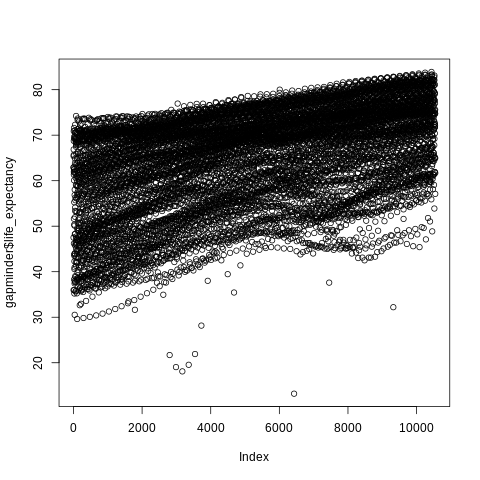

In [19]:
%%R
#MAL
plot(gapminder$life_expectancy)

In [20]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

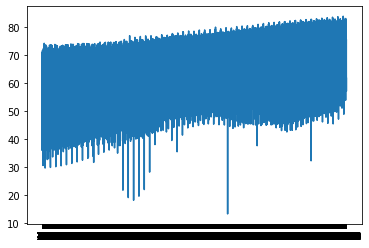

In [21]:
# Convertir el dataset en un objeto de pandas en Python
gapminder = pd.DataFrame(gapminder)

# Graficar la variable "life_expectancy"
plt.plot(gapminder['life_expectancy'])
plt.show()

#Los lienzos de dibujo. 

ggplot y matplotlib son dos bibliotecas de visualización de datos populares en Python. Ambas bibliotecas permiten crear gráficos a partir de lienzos vacíos.

En ggplot, puedes crear un lienzo vacío con la función ggplot() y luego agregar capas de elementos (como puntos, líneas, etiquetas, etc.) al lienzo utilizando funciones como geom_point(), geom_line(), labs(), entre otras.


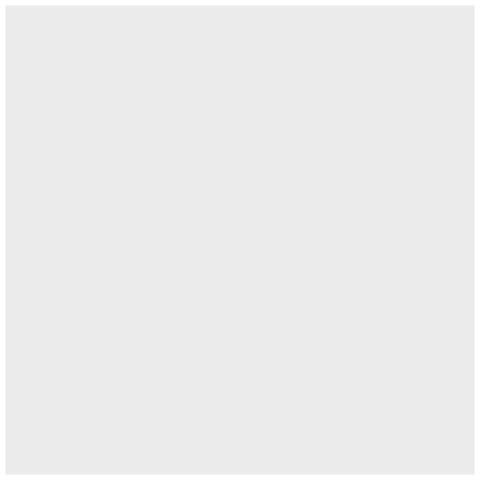

In [22]:
%%R

ggplot()

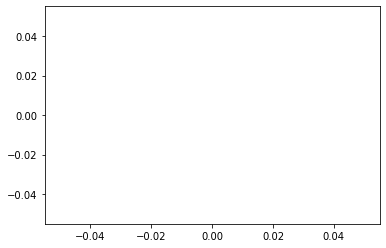

In [23]:
import matplotlib.pyplot as plt

plt.plot()
plt.show()



Como puedes ver, aqui tenemos dos lienzos vacíos de trabajo, en ámbos casos  está simplemente la cuadricula sin nada dibujado, sin embargo, podemos ver que si está el papel, el lienzo listo para dibujar. 

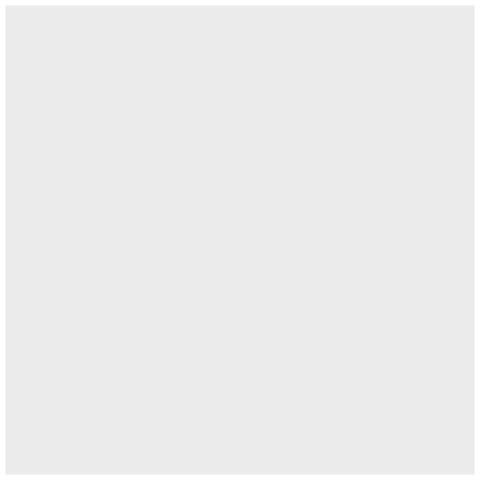

In [24]:
%%R

ggplot(data = murders)
murders %>% ggplot()

#geometría del cuadro

El comando geom de ggplot permite agregar capas gráficas al lienzo creado con ggplot. Cada capa gráfica puede ser una geometría diferente como puntos, líneas, barras, entre otros.

Por ejemplo, si queremos agregar puntos a nuestro gráfico de murders, podemos usar la geometría geom_point(). El siguiente código muestra cómo hacerlo:

#geom_point / Scatter_plot

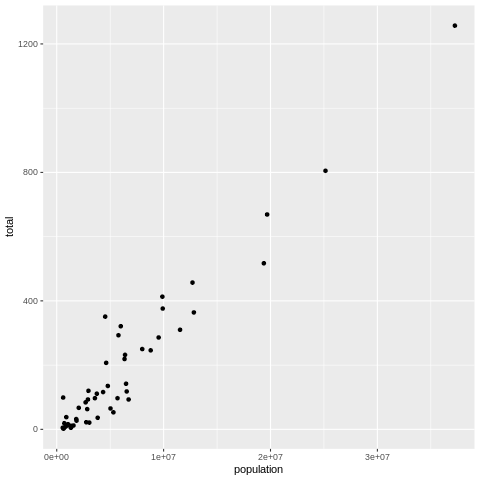

In [25]:
%%R

ggplot(data = murders) +
  geom_point(mapping = aes(x = population, y = total))

En este ejemplo, estamos creando un gráfico de puntos donde el eje X representa la población y el eje Y el total de asesinatos. Usamos la función geom_point() para agregar la capa de puntos al gráfico y especificamos los datos y la estética (mapping) con la función aes().

Para crear gráficos similares a los de ggplot usando matplotlib, podemos usar la biblioteca seaborn, que es una extensión de matplotlib que proporciona una interfaz más simple y concisa para crear gráficos estadísticos. La función sns.scatterplot() es similar al comando ggplot() con la opción geom_point().

Por ejemplo, para recrear el gráfico de dispersión de murders con ggplot() que utilizó el comando geom_point(), podemos usar el siguiente código con seaborn:

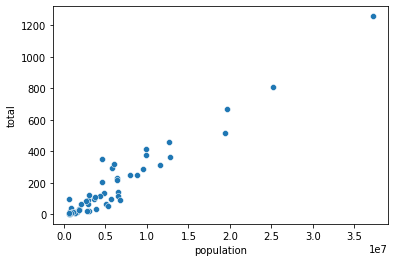

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=murders, x="population", y="total")
plt.show()


Vamos con otro ejemplo utilizando el mismo conjunto de datos murders y el comando geom_bar() de ggplot2 en R:

#Geom_bar / Histogramas

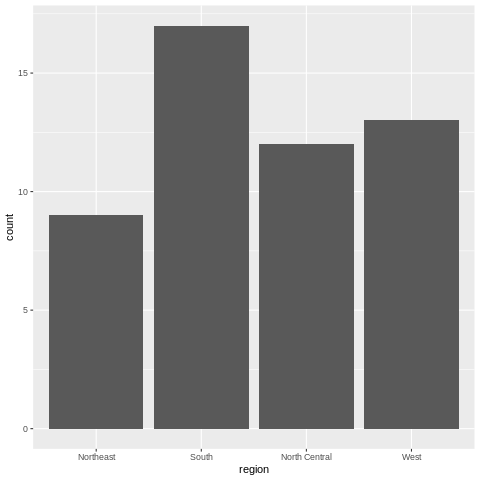

In [27]:
%%R

ggplot(data = murders) +
  geom_bar(mapping = aes(x = region))

En Python, utilizando matplotlib, podríamos graficar el mismo histograma con el siguiente código:

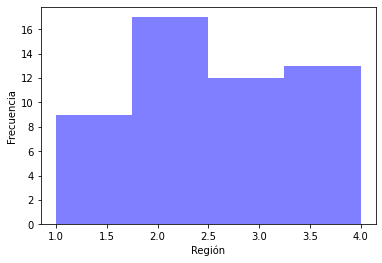

In [28]:
plt.hist(murders['region'], bins=4, alpha=0.5, color='blue')
# establece los títulos de los ejes y el título del plot
plt.xlabel('Región')
plt.ylabel('Frecuencia')
# muestra el plot
plt.show()


#Geom_line / lineplot

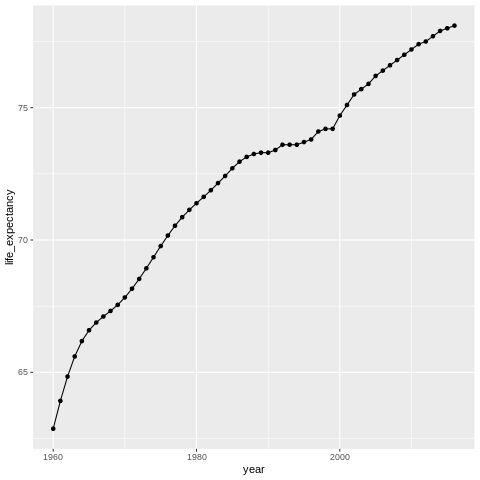

In [49]:
%%R 

ggplot(gapminder[gapminder$country == "Albania",], aes(x=year, y=life_expectancy)) +
  geom_line(aes(group=1)) +
  geom_point()

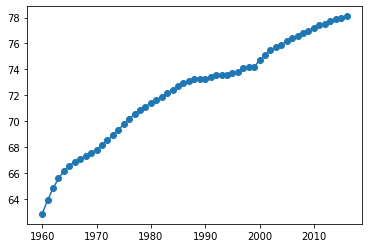

In [47]:
# Filtrar por país y seleccionar las columnas year y life_expectancy
us_data = gapminder.loc[gapminder['country'] == 1, ['year', 'life_expectancy']]
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Agregar la línea y los puntos
ax.plot(us_data['year'], us_data['life_expectancy'])
ax.scatter(us_data['year'], us_data['life_expectancy'])
# Mostrar la figura
plt.show()


#geom_boxplot / boxplot

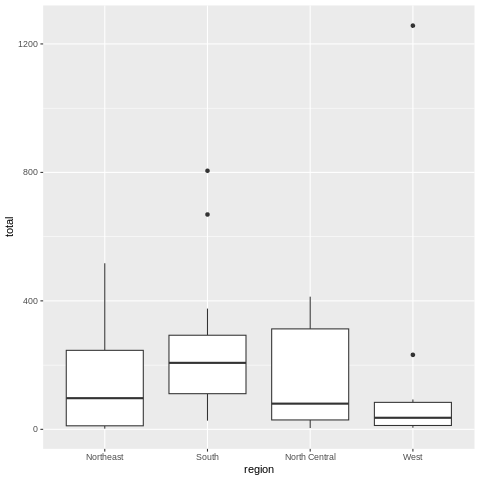

In [54]:
%%R
ggplot(murders, aes(x = region, y = total)) +
  geom_boxplot() 

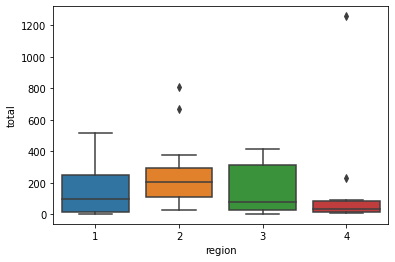

In [57]:
sns.boxplot(x = "region", y = "total", data = murders)
plt.show()

#Gráficos de tortas

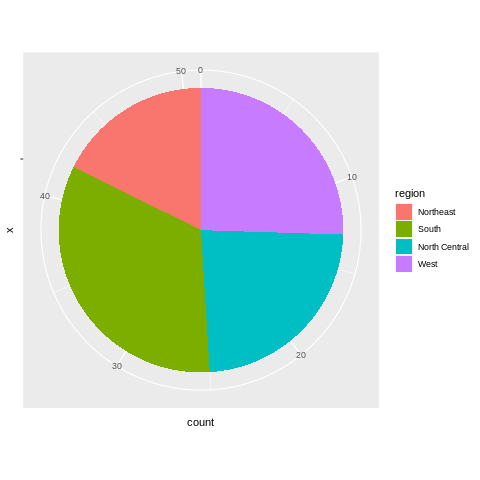

In [59]:
%%R
ggplot(murders, aes(x = "", fill = region)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y")

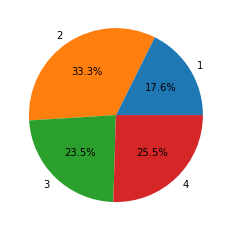

In [61]:
region_counts = murders.groupby("region").size()
plt.pie(region_counts, labels = region_counts.index, autopct='%1.1f%%')
plt.show()

#ESTÉTICA------------- aesthetics

El comando aes (abreviatura de aesthetics = "estética") en ggplot2 se utiliza para asignar variables a atributos visuales, como el color, el tamaño, la forma, la transparencia, etc. de los elementos gráficos. El comando aes es fundamental para crear visualizaciones en ggplot2 ya que permite crear gráficos dinámicos y que se actualizan a medida que cambian los datos.

Aquí hay un ejemplo:

Ejemplo: Gráfico de barras

El dataframe "murders" de ggplot2 contiene información sobre homicidios en diferentes estados de los Estados Unidos. Supongamos que queremos crear un gráfico de barras que muestre la tasa de homicidios por cada estado. Podemos utilizar ggplot2 y el comando aes para asignar la tasa de homicidios al eje y y el estado al eje x, de la siguiente manera:

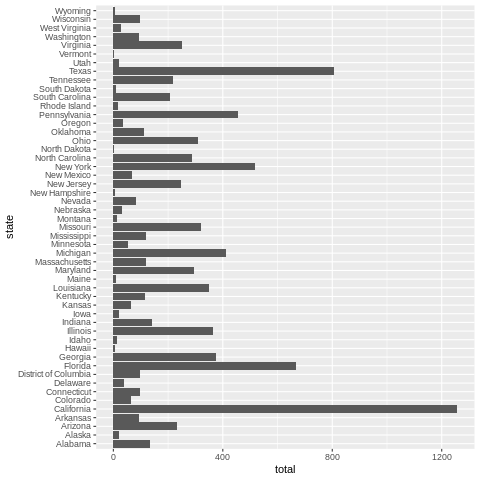

In [37]:
%%R
# grafico de barras de tasa de homicidios por estado
ggplot(murders, aes(x = state, y = total)) +
  geom_bar(stat = "identity") + #stat = "identity" asigna la altura de cada tasa de homicidios a las barras
  coord_flip()#voltea el gráfico


El principio de asignación de atributos visuales a variables en ggplot2 de R es similar en su enfoque a la biblioteca Seaborn de Python, que se basa en la biblioteca Matplotlib de Python. Al igual que ggplot2, Seaborn utiliza un enfoque de asignación de variables para la creación de visualizaciones, donde las variables se asignan a los diferentes atributos visuales, como color, tamaño, forma, etc.

Aquí hay un ejemplo que ilustra cómo se utiliza el mismo principio en Python usando Seaborn:

Ejemplo: Gráfico de barras utilizando el conjunto de datos "murders"

Supongamos que queremos crear un gráfico de barras para visualizar la tasa de homicidios por cada estado en el conjunto de datos "murders". Podemos hacerlo utilizando Seaborn y asignando la variable de estado al eje x y la variable de tasa de homicidios al eje y:

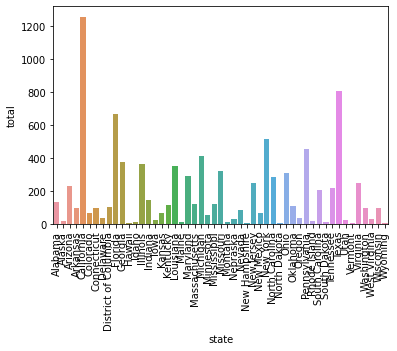

In [42]:
# grafico de barras de tasa de homicidios por estado
sns.barplot(x="state", y="total", data=murders)
plt.xticks(rotation=90)
# mostrar el gráfico
plt.show()


In [ ]:




murders %>% 
   ggplot() +
   geom_point(aes(x = population, y = total))

#También podemos definir el objeto P que ya habíamos definido. 
p + geom_point(aes(population, total))

#Capas--------------
#ggplot(aes(X,Y, condición= variable))
p + geom_point(aes(population, total)) +
   geom_text(aes(population, total, label = abb))
